## Personal Loan Campaign Project

 ### Details Background and Context

 **AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).**

 **A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.**

 **You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.**


 **Objective**

- **To predict whether a liability customer will buy a personal loan or not.**
- **Which variables are most significant.**
- **Which segment of customers should be targeted more.**

### Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)

### Upload all required Libraries

In [1]:
# Import all necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm

In [2]:
# Read in the Dataframe
df = pd.read_csv("Loan_Modelling (1).csv")
df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1176,1177,29,3,103,90049,4,3.40,1,0,1,0,0,1,0
2403,2404,38,13,140,90210,4,0.50,1,0,1,0,0,0,0
4158,4159,59,34,74,92780,4,0.70,1,0,0,0,0,1,1
1290,1291,62,38,100,90277,4,1.70,2,0,0,0,0,1,0
1413,1414,48,24,12,90058,3,0.40,1,0,0,0,0,0,0
896,897,50,24,161,95133,3,3.40,1,212,1,0,0,1,0
4212,4213,50,23,9,94109,1,0.50,2,98,0,0,0,1,0
3170,3171,43,16,65,94110,3,2.67,2,100,0,0,0,0,0
3562,3563,32,8,169,94596,1,6.50,3,272,1,1,1,1,0
3567,3568,51,26,43,91040,1,1.30,2,123,0,0,0,1,0


In [3]:
df['Personal_Loan'].value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [4]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- **The dataset consists of 5,000 entries across 14 columns, detailing customer information such as age, income, family size, and banking behaviors like credit card usage and loan acceptance. Each column is fully populated with no null values, indicating a complete dataset ready for analysis.**

In [5]:
# Review the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- **The dataset summary for 5,000 customers reveals key statistics across various attributes/columns, including age, income, family size etc. The average age of customers is approximately 45 years, with an average income of around 73.7k dollar, and an average family size of 2.4. It covers a wide range of financial details, from average monthly credit card spending (1.94k dollar) to education levels, indicating a diverse customer base. Notably, the data includes information on whether customers have accepted personal loans, hold securities or CD accounts, use online banking, and own a credit card, providing a comprehensive view for predictive modeling.**

In [6]:
# To check for duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

- **No duplicated rows was observed**

In [7]:
 # Further investigating to check the unique values in the family column
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

- **This column has no unwanted figures**

In [8]:
# Inspecting the 'Experience' column
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

- **Certainly, we can tell that there in an anomaly here as we obviously cannot have years of professional Experience to have negative figures  (-1,-2,-3) in our dataset, this is most likely going to be an error during documentation**

In [9]:
# Inspecting the 'Experience' column
negetive_count= df['Experience'].value_counts().loc[-1]+df['Experience'].value_counts().loc[-2]+df['Experience'].value_counts().loc[-3]
negetive_count

52

- **The total negative count of Years of experience in our dataset is 52, We can decide to remove them form our data set or set them to zero, since our tatol data is 5000, this might not have to much impact on our output.**

In [10]:
# We decided to remove negetive count from out dataset
df = df[df['Experience']>=0]

In [11]:
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
# To inspect the 'Exoerience' column for negative values
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

- **We have successfully removed all negative values in the 'Experience' column as indicated above.**

In [13]:
# Check the age column for any abnormaly
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63], dtype=int64)

### Data Visualization

C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_744\2847603515.py:10: UserWarning: The figure layout has changed to tight

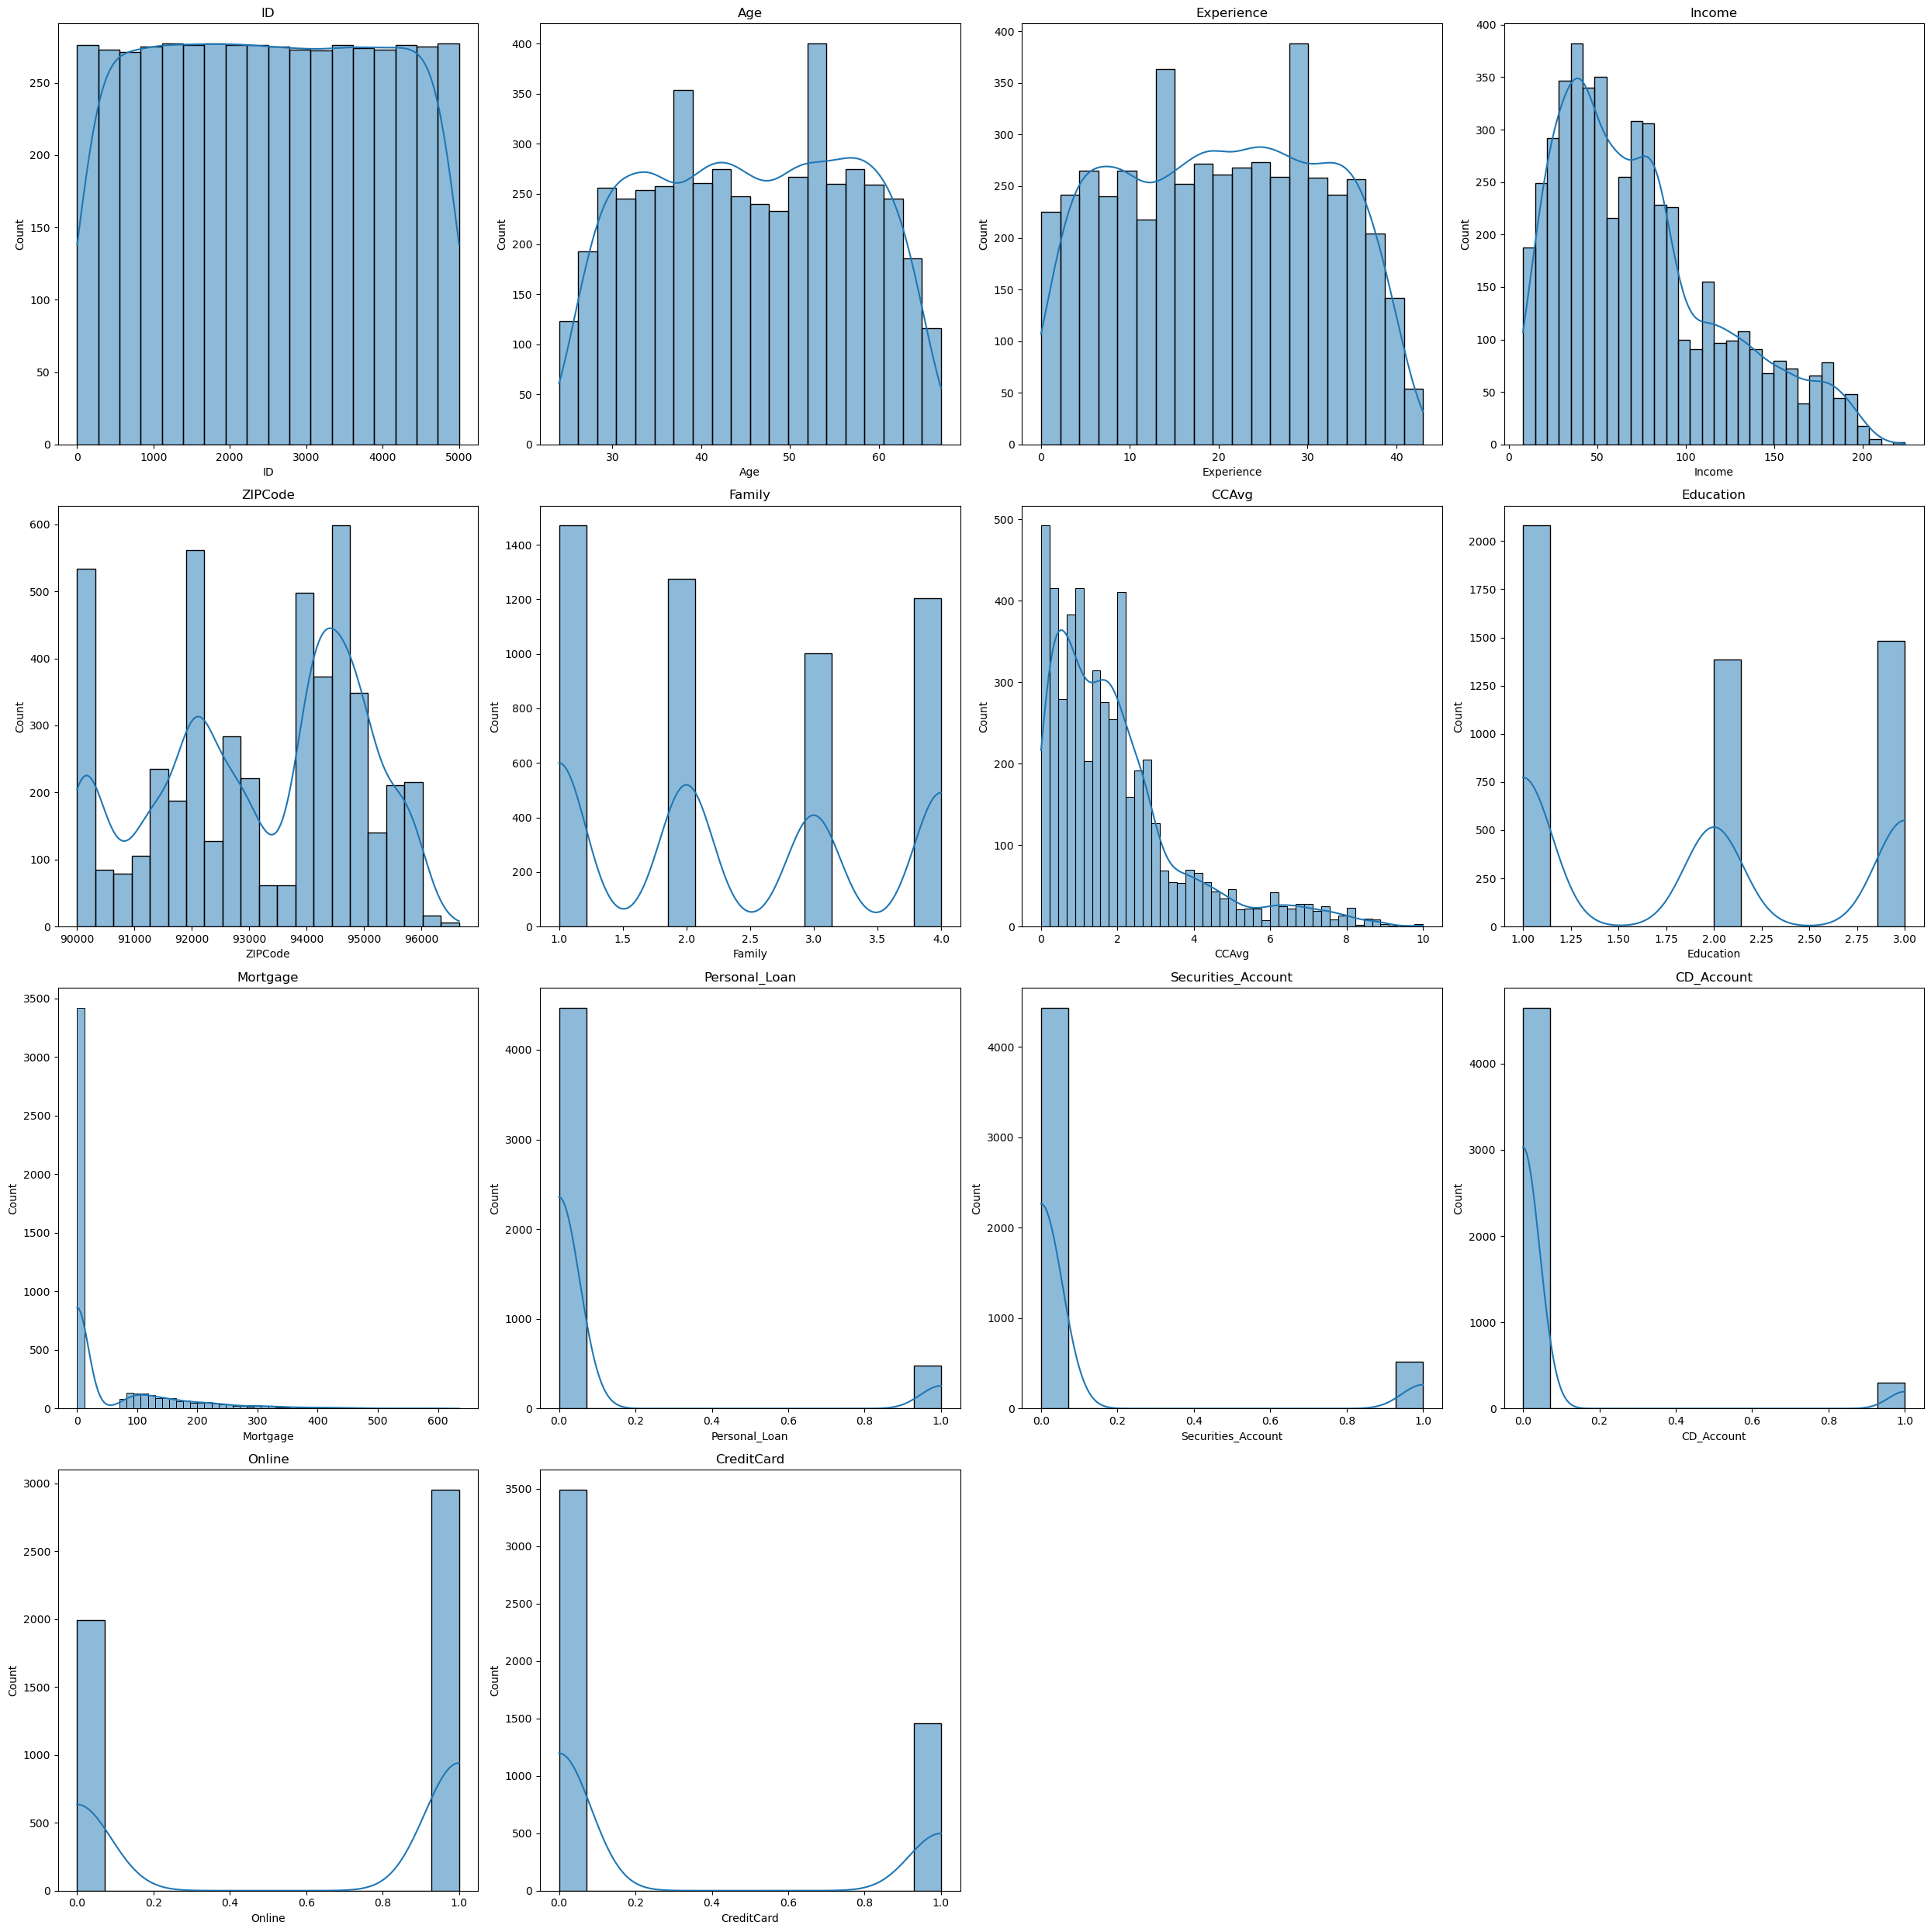

In [14]:
# plot the distribution for all numerical feature in our dataset
# set the figure for the distribution plot
plt.figure(figsize= (25,25))
           
# looping through all the columns and plot the distribution plot
for i, col in enumerate(df.columns):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(col)
    plt.tight_layout()
plt.show()

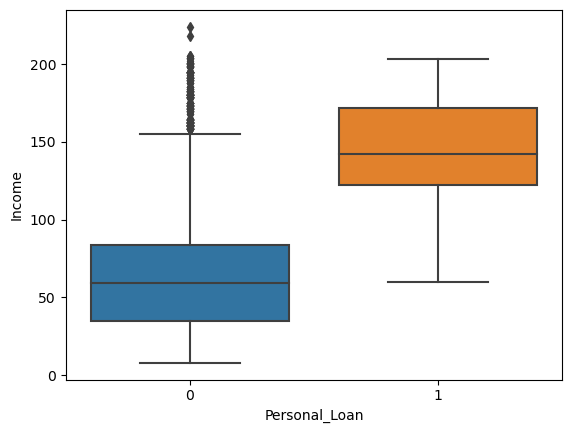

In [15]:
# Using Box Plot to visualize 
sns.boxplot(data=df, x="Personal_Loan", y="Income")

plt.show()

In [16]:
# Distribution of the target

df["Personal_Loan"].value_counts(normalize= True)

Personal_Loan
0    0.902991
1    0.097009
Name: proportion, dtype: float64

- **This indicate that our data is imbalance**

- **To determine the strength of the trends between these numerical variables, we can calculate the correlation coefficients. Lets visualise these using a heat map**

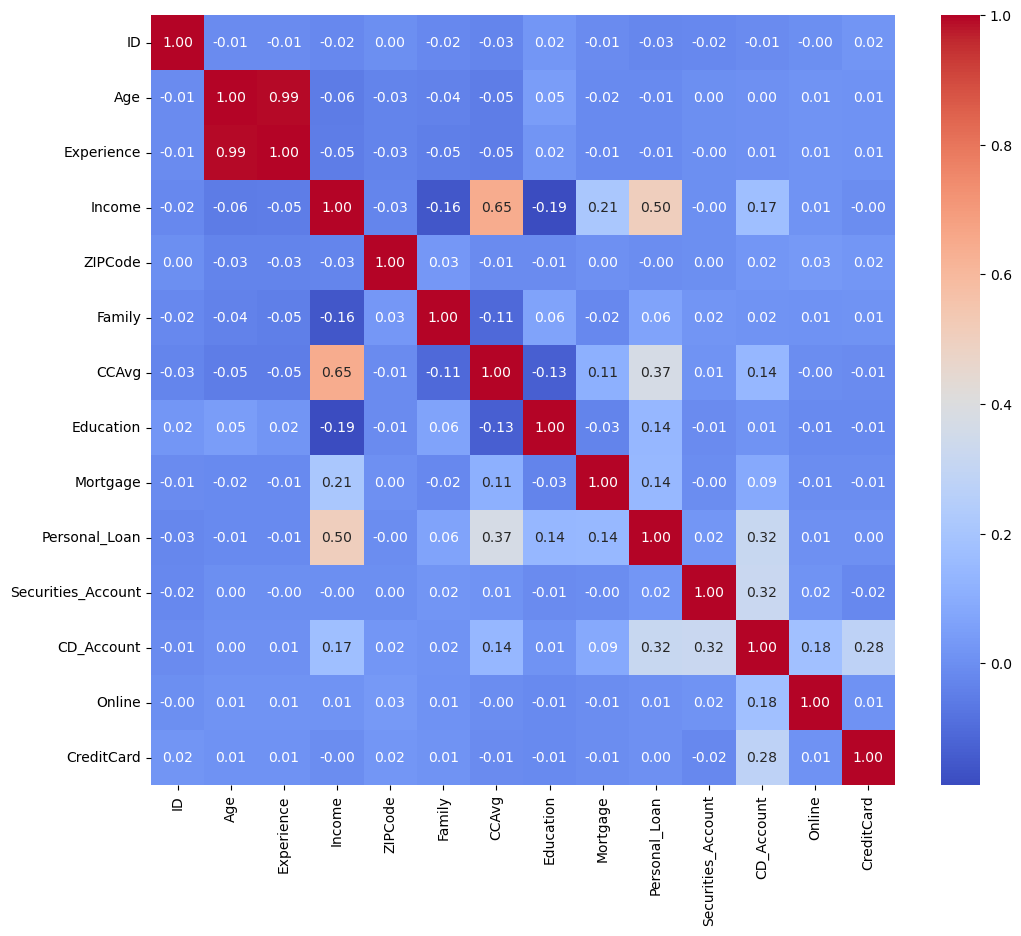

In [17]:
# Calculate correlation matrix between all columns in the data frame
# Use heatmap function to visualise the matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 10))  

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

- **The above indicate a strong correlation between Income and the  Personal_loan(0.50), CCAvg and Personal_loan(0.37) and CD_Account and personal_loan(0.32)**

### Feature Selection

In [18]:
# Extract the input features.
x = df.drop("Personal_Loan", axis = 1)
#x = df[feature_names]

# Extract the output features.
y = df["Personal_Loan"]

### Using Seaborn, Check the distribution across the class labels

- **we want to ensure that we train our model on a balanced dataset that contains (approximately) equal numbers of each class label. If one class label is a lot more common than the others, it will carry a lot more weight when we train the model, which may be bias on our final results**

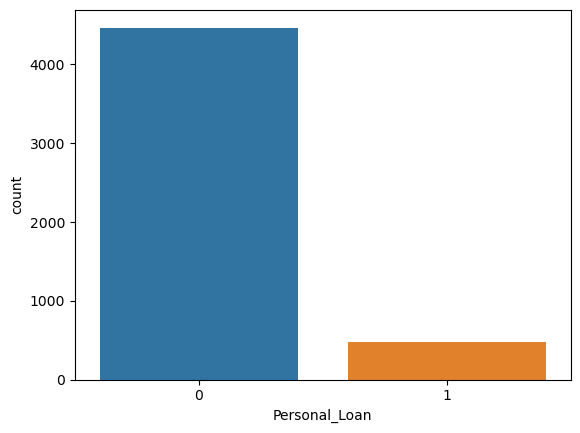

In [19]:
# Use seaborn to plot the distribution of class labels
sns.countplot(data = df, x = "Personal_Loan")
# Show the plot
plt.show()

- **We see from the above that customer who do not take the previous loan are the most common with fewer customer who took the loan, The imbalance between them are not relatively modest so we need to re-balance the data so each class is equally distributed**

### Using SMOTE to balance the data labels

In [20]:
# Import the SMOTE class from the sklearn library.
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class, and set the relevant parameters.
sm = SMOTE(random_state=42, k_neighbors = 2)

# Apply the SMOTE technique to the original data, x and y.
x_res, y_res = sm.fit_resample(x, y)

<Axes: xlabel='Personal_Loan', ylabel='count'>

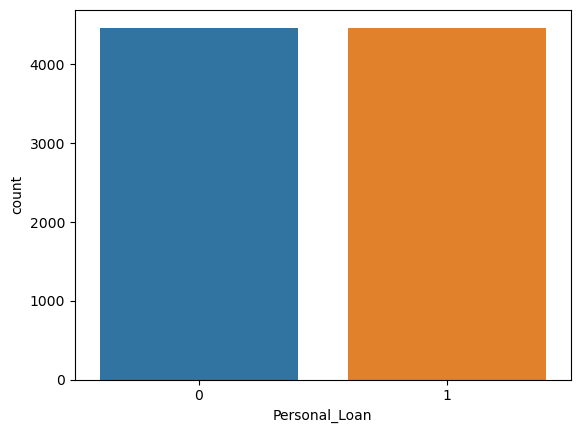

In [21]:
# To make the plotting easier, I have converted the array of class label outputs in the re-sampled dataset into a new Pandas data frame.

new_df = pd.DataFrame({"Personal_Loan" : y_res.to_numpy()})

# Now use Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Personal_Loan")

In [22]:
# Split the x_res and y_res data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

### Building the Model

In [23]:
# Import the RandomForestClassifier model from the sklearn library 
from sklearn.ensemble import RandomForestClassifier

# Create an instance of this model.
loan_class = RandomForestClassifier()

# Fit the model to the training data.
loan_class.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [24]:
# Use the trained model to predict the output
# class labels for the training set.
loan_pred = loan_class.predict(x_test_scaled)
loan_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

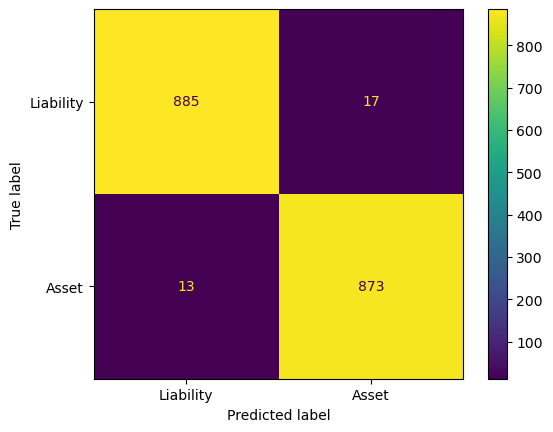

In [25]:
# Import the functions that we will need for
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, loan_pred, labels = [0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = ["Liability", "Asset"])
disp.plot()

- **The model appears to perform well, with high numbers of true positives and true negatives indicating correct classifications, and relatively low numbers of false positives and false negatives indicating few misclassifications.**

- True Positive- 886 were correctly predicted as "Liability".

- True Negative- 872 were correctly predicted as "Asset".

- False Negative- 14 were incorrectly predicted as "Liability" when they were actually "Asset".

- False Positive- 16 were incorrectly predicted as "Asset" when they were actually "Liability".

In [26]:
# Import the classification_report function from sklearn
from sklearn.metrics import classification_report

# Print the classification report for this model.
print(classification_report(y_test, loan_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       902
           1       0.98      0.99      0.98       886

    accuracy                           0.98      1788
   macro avg       0.98      0.98      0.98      1788
weighted avg       0.98      0.98      0.98      1788



- **The overall accuracy of the model across both classes is 0.98, indicating that 98% of the total predictions made by the model were correct. The macro average and the weighted average for precision, recall, and f1-score are all 0.98, which further confirms the model's consistent performance across both classes. The support for class 0 is 902 and for class 1 is 886, showing the number of actual occurrences of each class in the dataset.**

### Feature Importances

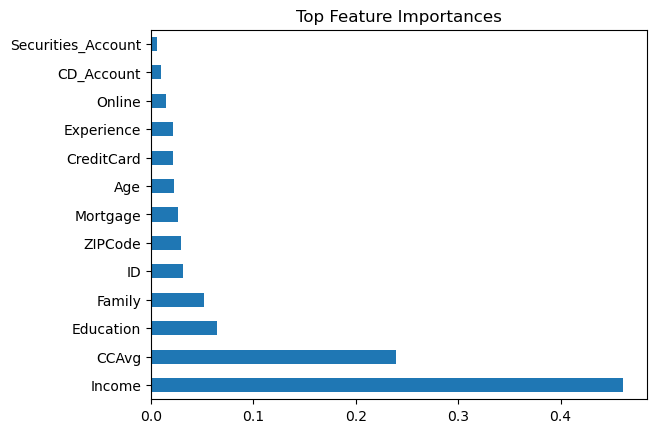

In [27]:
# Get feature importances
feature_importances = pd.Series(loan_class.feature_importances_, index=x_train.columns)

# Plot feature importances
feature_importances.nlargest(14).plot(kind='barh')  # Adjust according to how many top features you wish to display
plt.title('Top Feature Importances')
plt.show()

- **The above Feature Importance plot shows the contribution of each feature to the prediction of whether a liability customer will buy a personal loan or not.**
- **The first five most important feature is 'Income, CCAvg, Education, Family and ZIPCode'.**

### - Using the Top Five(5) feature to predict wheather a liability customer will buy a personal loan or not 

In [28]:
# Extract the input features.
feature_names = ["Income","ZIPCode", "Family", "CCAvg", "Education"]
x = df[feature_names]

# Extract the output features.
y = df["Personal_Loan"]

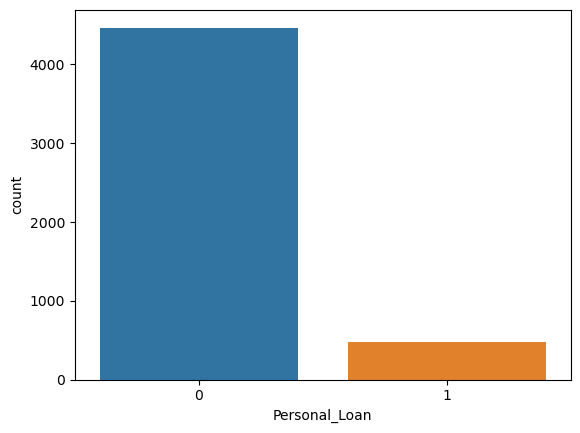

In [29]:
# Use seaborn to plot the distribution of class labels
sns.countplot(data = df, x = "Personal_Loan")
# Show the plot
plt.show()

In [30]:
# Import the SMOTE class from the sklearn library.
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class, and set the relevant parameters.
sm = SMOTE(random_state=42, k_neighbors = 2)

# Apply the SMOTE technique to the original data, x and y.
x_res, y_res = sm.fit_resample(x, y)

<Axes: xlabel='Personal_Loan', ylabel='count'>

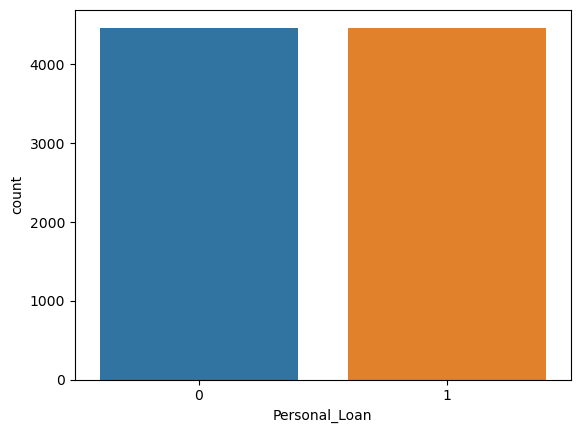

In [31]:
# To make the plotting easier, I have converted the array of class label outputs in the re-sampled dataset into
# a new Pandas data frame.
new_df = pd.DataFrame({"Personal_Loan" : y_res.to_numpy()})

# Now use Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Personal_Loan")

In [32]:
# Split the x_res and y_res data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [33]:
# Import the RandomForestClassifier model from the sklearn library 
from sklearn.ensemble import RandomForestClassifier

# Create an instance of this model.
loan_class = RandomForestClassifier()

# Fit the model to the training data.
loan_class.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [34]:
# Use the trained model to predict the output
# class labels for the training set.
loan_pred = loan_class.predict(x_test_scaled)
loan_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

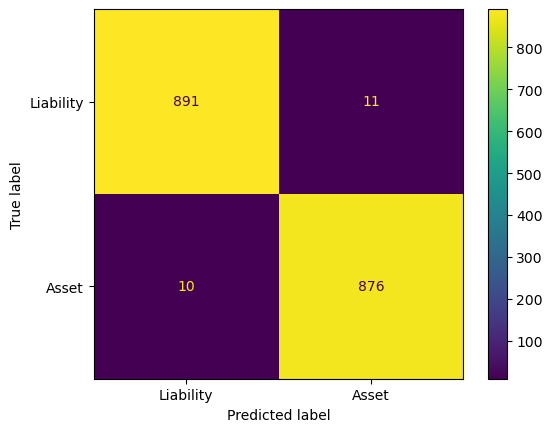

In [35]:
# Import the functions that we will need for
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, loan_pred, labels = [0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = ["Liability", "Asset"])
disp.plot()

- **The model appears to perform well, with high numbers of true positives and true negatives indicating correct classifications, and relatively low numbers of false positives and false negatives indicating few misclassifications.**


- True Positive- 888 were correctly predicted as "Liability".
- True Negative- 875 were correctly predicted as "Asset".
- False Negative- 14 were incorrectly predicted as "Liability" when they were actually "Asset".
- False Positive- 11 were incorrectly predicted as "Asset" when they were actually "Liability".

In [36]:
# Import the classification_report function from sklearn
from sklearn.metrics import classification_report

# Print the classification report for this model.
print(classification_report(y_test, loan_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       902
           1       0.99      0.99      0.99       886

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



- **The overall accuracy of the model across both classes is 0.99, indicating that 99% of the total predictions made by the model were correct. The macro average and the weighted average for precision, recall, and f1-score are all 0.99, which further confirms the model's consistent performance across both classes. The support for class 0 is 902 and for class 1 is 886, showing the number of actual occurrences of each class in the dataset.**

### Using Decision Tree to predict our Target

In [37]:
# Extract the input features.
x = df.drop("Personal_Loan", axis = 1)
#x = df[feature_names]

# Extract the output features.
y = df["Personal_Loan"]

In [38]:
# Extract the input features.
#feature_names = ["Income","ZIPCode", "Family", "CCAvg", "Education"]
#x = df[feature_names]

# Extract the output features.
#y = df["Personal_Loan"]

In [39]:
# Split the x_res and y_res data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

### Model Building with an Inbalanced Data

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    """"
    
    Function to compute different matric to check classification model performance
    
    model = classifier
    predictors = independent variables
    target = dependent variable
    
    """
    # Generate predictions using independent variables
    pred = model.predict(predictors)
    
    # Calculate accuracy
    accuracy = accuracy_score(target, pred)
    print(f'Accuracy: {accuracy}')
    
    # Generate a recall_score
    recall = recall_score(target, pred)
    print(f'Recall_score: \n{recall}')
    
    # Generate a precision score
    precision = precision_score(target, pred)
    print(f'Precision_score: \n{precision}')
    
    # Generate f1_score
    f1 = f1_score(target, pred)
    print(f'F1_score: \n{f1}')
    
#     # Creating dataframe matrix
#     df_perf = pd.DataFrame{
#         []
#     }
    
    # Return the metrics as a dictionary, if needed
    return {
        'accuracy': accuracy,
        'Recall_score': recall,
        'F1_score': f1,
        'Precision':precision
    }

In [41]:
# Create an instance of this model.
dtree = DecisionTreeClassifier(random_state=0)

# Fit the model to the training data.
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
model_performance_classification_sklearn(dtree,x_train,y_train)

Accuracy: 1.0
Recall_score: 
1.0
Precision_score: 
1.0
F1_score: 
1.0


{'accuracy': 1.0, 'Recall_score': 1.0, 'F1_score': 1.0, 'Precision': 1.0}

- **The model achieved an accuracy, recall, precision, and F1 score of 1.0, which suggests that it correctly predicted every instance in the dataset without any false positives or false negatives. This type of performance indicate overfitting, This is because our performance was on the training data set.**

In [43]:
# Using the testing dataset
model_performance_classification_sklearn(dtree,x_test,y_test)

Accuracy: 0.9818181818181818
Recall_score: 
0.9027777777777778
Precision_score: 
0.9090909090909091
F1_score: 
0.9059233449477352


{'accuracy': 0.9818181818181818,
 'Recall_score': 0.9027777777777778,
 'F1_score': 0.9059233449477352,
 'Precision': 0.9090909090909091}

- **The above shows Accuracy (0.9818 or 98.18%): The model correctly predicted the outcome for 98.18% of the cases in the test set. This high accuracy rate suggests that the model is very effective for the given data.**
- **Recall (0.9028 or 90.28%): The model correctly identified 90.28% of the actual positive cases**
- **Precision (0.9091 or 90.91%): Out of all the instances where the model predicted a positive outcome (e.g., predicting that a customer would purchase a personal loan), 90.91% of those predictions were correct.**
- **F1 Score (0.9059 or 90.59%): The F1 score is a the mean of precision and recall.**
- **Generally, this model appears to perform well on the task of predicting personal loan purchases among customers, with high marks across all metrics.**

### Using a Balanced Dataset

In [44]:
# Extract the input features.
x = df.drop("Personal_Loan", axis = 1)
#x = df[feature_names]

# Extract the output features.
y = df["Personal_Loan"]

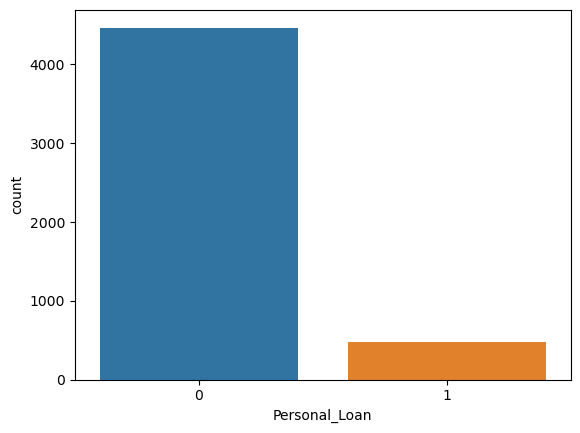

In [45]:
# Use seaborn to plot the distribution of class labels
sns.countplot(data = df, x = "Personal_Loan")
# Show the plot
plt.show()

### Using SMOTE to balance our dataset

In [46]:
# Using SMOTE to balance the data
# # Import the SMOTE class from the sklearn library.
# from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class, and set the relevant parameters.
sm = SMOTE(random_state=42, k_neighbors = 2)

# Apply the SMOTE technique to the original data, x and y.
x_sm, y_sm = sm.fit_resample(x, y)

<Axes: xlabel='Personal_Loan', ylabel='count'>

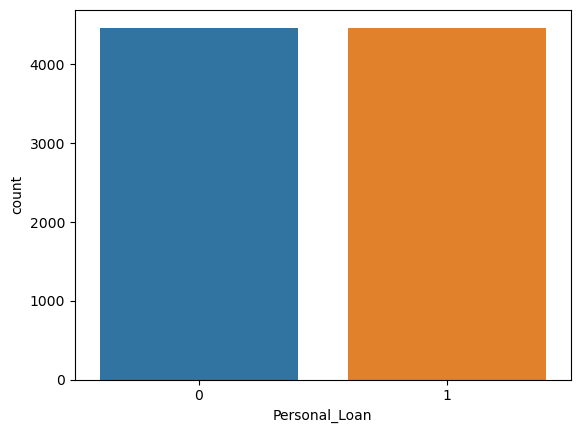

In [47]:
# To make the plotting easier, I have converted the array of class label outputs in the re-sampled dataset into
# a new Pandas data frame.
new_df = pd.DataFrame({"Personal_Loan" : y_sm.to_numpy()})

# Now use Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Personal_Loan")

In [48]:
# Split the x_sm and y_sm data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)

### Using DecisionTree to Building our data with a balance dataset using all the variables in the dataset

In [49]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    """"
    
    Function to compute different matric to check classification model performance
    
    model = classifier
    predictors = independent variables
    target = dependent variable
    
    """
    # Generate predictions using independent variables
    pred = model.predict(predictors)
    
    # Calculate accuracy
    accuracy = accuracy_score(target, pred)
    print(f'Accuracy: {accuracy}')
    
    # Generate a recall_score
    recall = recall_score(target, pred)
    print(f'Recall_score: \n{recall}')
    
    # Generate a precision score
    precision = precision_score(target, pred)
    print(f'Precision_score: \n{precision}')
    
    # Generate f1_score
    f1 = f1_score(target, pred)
    print(f'F1_score: \n{f1}')
    
#     # Creating dataframe matrix
#     df_perf = pd.DataFrame{
#         []
#     }
    
    # Return the metrics as a dictionary, if needed
    return {
        'accuracy': accuracy,
        'Recall_score': recall,
        'F1_score': f1,
        'Precision':precision
    }

In [50]:
# Create an instance of this model.
dtree = DecisionTreeClassifier(random_state=0)

# Fit the model to the training data.
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
model_performance_classification_sklearn(dtree,x_test,y_test)

Accuracy: 0.9748322147651006
Recall_score: 
0.9785553047404063
Precision_score: 
0.9708846584546472
F1_score: 
0.9747048903878583


{'accuracy': 0.9748322147651006,
 'Recall_score': 0.9785553047404063,
 'F1_score': 0.9747048903878583,
 'Precision': 0.9708846584546472}

- **With the performance metrics provided above, it's evident that the classification model we developed is highly effective in predicting whether a liability customer will buy a personal loan or not.**
- **Model Confidence: The high accuracy, precision, recall, and F1 score suggest that the model is both reliable and precise, Hence we can confidently use this model in an Unseen data and we should expect a similar performance as above**